# Analyse Finanical data using Python

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader.data as pdr
import yfinance as yf
yf.pdr_override()
from datetime import datetime
data = pdr.get_data_yahoo('^GSPC', datetime(1970, 1, 1))

import matplotlib.pyplot as plt
%matplotlib inline

import cvxopt as opt 
from cvxopt import blas, solvers

[*********************100%***********************]  1 of 1 completed


### Import data

names = ["BioNTech SE", "Pinterest Inc", "Novartis AG", "Tesla", "First Citizens BancShares, Inc", "Apple Inc", "Google", "Meta", "GE"]

1 Jan 2020 to today

In [2]:
symbols =["BNTX", "PINS", "NVS", "TSLA", "FCNCA", "AAPL", "GOOG", "META", "GE"]
start_date = datetime(2020,1,1)
end_date = datetime.today()
stock_data = pdr.get_data_yahoo(symbols, start_date, end_date)

[*********************100%***********************]  9 of 9 completed


In [3]:
stock_data.head()

Adj Close                                               \
                 AAPL       BNTX       FCNCA         GE       GOOG   
Date                                                                 
2020-01-02  73.449394  37.996727  531.996704  73.509972  68.368500   
2020-01-03  72.735306  39.526466  526.374695  73.756432  68.032997   
2020-01-06  73.314880  43.997250  520.515259  74.803940  69.710503   
2020-01-07  72.970085  42.773460  521.732727  74.249390  69.667000   
2020-01-08  74.143906  44.510452  522.286987  73.571587  70.216003   

                                                             Close  ...  \
                  META        NVS       PINS       TSLA       AAPL  ...   
Date                                                                ...   
2020-01-02  209.779999  81.028885  18.799999  28.684000  75.087502  ...   
2020-01-03  208.669998  80.892342  18.360001  29.534000  74.357498  ...   
2020-01-06  212.600006  81.438515  18.910000  30.102667  74.949997  ...   
2020-01-07  213.059998  80.627800  19.260000  31.270666  74.597504  ...   
2020-01-08  215.220001  80.627800  19.719999  32.809334  75.797501  ...   

                 Open     Volume                                               \
                 TSLA       AAPL    BNTX  FCNCA        GE      GOOG      META   
Date                                                                            
2020-01-02  28.299999  135480400  139500  33700  13998416  28132000  12077100   
2020-01-03  29.366667  146322800  176000  30800  13752464  23728000  11188400   
2020-01-06  29.364668  118387200  333300  61800  17925786  34646000  17058900   
2020-01-07  30.760000  108872000  562100  50400  11301510  30054000  14912400   
2020-01-08  31.580000  132079200  193900  32200   8871325  30560000  13475000   

                                         
                NVS     PINS       TSLA  
Date                                     
2020-01-02  1213000  6334600  142981500  
2020-01-03  1062300  5203200  266677500  
2020-01-06  1487600  7978900  151995000  
2020-01-07  1150200  7471500  268231500  
2020-01-08   982100  7363500  467164500  

[5 rows x 54 columns]

In [4]:
#Adjusted Close price is closing price adjusted for corporate actions such as stock splits and divs
adjusted_closing_price = stock_data['Adj Close']
adjusted_closing_price.head()

,AAPL,BNTX,FCNCA,GE,GOOG,META,NVS,PINS,TSLA
Date,,,,,,,,,
2020-01-02,73.449394,37.996727,531.996704,73.509972,68.368500,209.779999,81.028885,18.799999,28.684000
2020-01-03,72.735306,39.526466,526.374695,73.756432,68.032997,208.669998,80.892342,18.360001,29.534000
2020-01-06,73.314880,43.997250,520.515259,74.803940,69.710503,212.600006,81.438515,18.910000,30.102667
2020-01-07,72.970085,42.773460,521.732727,74.249390,69.667000,213.059998,80.627800,19.260000,31.270666
2020-01-08,74.143906,44.510452,522.286987,73.571587,70.216003,215.220001,80.627800,19.719999,32.809334


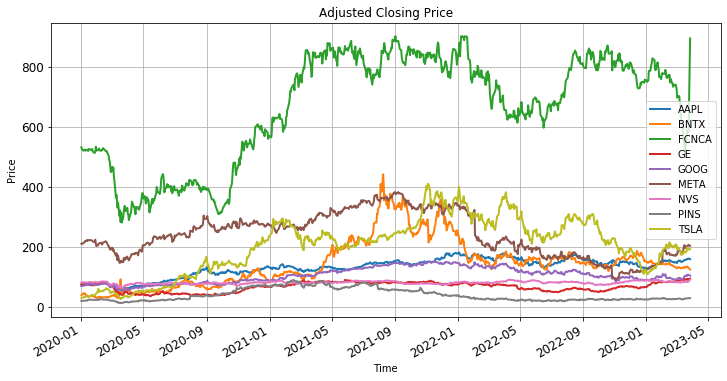

In [5]:
#test plotting Adjusted Closing price from the dataframe
adjusted_closing_price.plot(figsize=(12,6),linewidth=2, grid=True, fontsize=12)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Adjusted Closing Price')
plt.show()

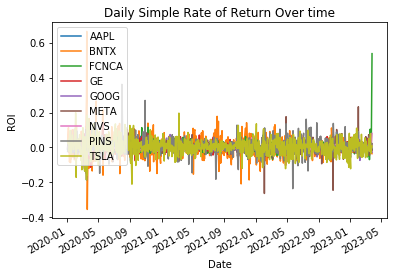

<Figure size 936x648 with 0 Axes>

In [6]:
stock_data_daily_returns = stock_data['Adj Close'].pct_change()
stock_data_daily_returns.plot()
plt.xlabel("Date")
plt.ylabel("ROI")
plt.title("Daily Simple Rate of Return Over time")
plt.figure(figsize=(13,9))
plt.show()

Text(0, 0.5, '% mean daily change')

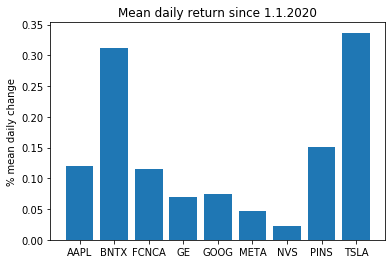

In [7]:
# calculate daily mean
daily_mean = stock_data_daily_returns.mean()
daily_mean

x = stock_data_daily_returns.keys()
plt.bar(x, daily_mean*100)
plt.title('Mean daily return since 1.1.2020')
plt.ylabel('% mean daily change')

Text(0.5, 1.0, 'Variance since 1.1.2020')

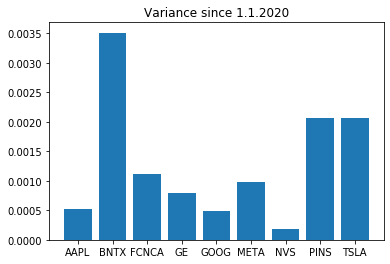

In [8]:
stock_variance = stock_data_daily_returns.var()
stock_variance

x = stock_data_daily_returns.keys()
plt.bar(x, stock_variance)
plt.title('Variance since 1.1.2020')

Text(0.5, 1.0, 'Standard dev since 1.1.2020')

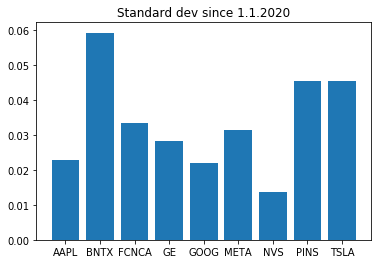

In [9]:
stock_std = stock_data_daily_returns.std()
stock_std

x = stock_data_daily_returns.keys()
plt.bar(x, stock_std)
plt.title('Standard dev since 1.1.2020')

In [10]:
stock_correlation = stock_data_daily_returns.corr()
stock_correlation

,AAPL,BNTX,FCNCA,GE,GOOG,META,NVS,PINS,TSLA
AAPL,1.000000,0.175507,0.301899,0.394670,0.715987,0.615500,0.448707,0.521573,0.519831
BNTX,0.175507,1.000000,0.055913,0.092734,0.208601,0.151972,0.158635,0.134705,0.069634
FCNCA,0.301899,0.055913,1.000000,0.495550,0.299578,0.272204,0.385789,0.306157,0.234555
GE,0.394670,0.092734,0.495550,1.000000,0.383476,0.295081,0.389996,0.261316,0.245998
GOOG,0.715987,0.208601,0.299578,0.383476,1.000000,0.697283,0.392882,0.517247,0.440505
META,0.615500,0.151972,0.272204,0.295081,0.697283,1.000000,0.302687,0.569122,0.361361
NVS,0.448707,0.158635,0.385789,0.389996,0.392882,0.302687,1.000000,0.256573,0.211304
PINS,0.521573,0.134705,0.306157,0.261316,0.517247,0.569122,0.256573,1.000000,0.387256
TSLA,0.519831,0.069634,0.234555,0.245998,0.440505,0.361361,0.211304,0.387256,1.000000


In [11]:
stock_covariance = stock_data_daily_returns.cov()
stock_covariance

,AAPL,BNTX,FCNCA,GE,GOOG,META,NVS,PINS,TSLA
AAPL,0.000520,0.000237,0.000229,0.000253,0.000358,0.000440,0.000141,0.000542,0.000538
BNTX,0.000237,0.003512,0.000110,0.000155,0.000271,0.000282,0.000130,0.000364,0.000187
FCNCA,0.000229,0.000110,0.001108,0.000464,0.000219,0.000284,0.000177,0.000464,0.000354
GE,0.000253,0.000155,0.000464,0.000792,0.000236,0.000260,0.000151,0.000335,0.000314
GOOG,0.000358,0.000271,0.000219,0.000236,0.000481,0.000479,0.000119,0.000516,0.000438
META,0.000440,0.000282,0.000284,0.000260,0.000479,0.000982,0.000131,0.000812,0.000514
NVS,0.000141,0.000130,0.000177,0.000151,0.000119,0.000131,0.000190,0.000161,0.000132
PINS,0.000542,0.000364,0.000464,0.000335,0.000516,0.000812,0.000161,0.002074,0.000800
TSLA,0.000538,0.000187,0.000354,0.000314,0.000438,0.000514,0.000132,0.000800,0.002059


## Mean-Variance Portfolio Optimization

In [12]:
# return_portfolios Copied from codeacademy
import random

def return_portfolios(expected_returns, cov_matrix):
  np.random.seed(1)
  port_returns = []
  port_volatility = []
  stock_weights = []
    
  selected = (expected_returns.axes)[0]
  #this specifies the number of random portfolios generated  
  num_assets = len(selected) 
  num_portfolios = 50000
    
  for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, expected_returns)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)
    
    portfolio = {'Returns': port_returns,
                 'Volatility': port_volatility}
    
  for counter,symbol in enumerate(selected):
    portfolio[symbol +' Weight'] = [Weight[counter] for Weight in stock_weights]
    
  df = pd.DataFrame(portfolio)
    
  column_order = ['Returns', 'Volatility'] + [stock+' Weight' for stock in selected]
    
  df = df[column_order]
   
  return df

In [13]:
# optimal_portfolio Copied from codeacademy
def optimal_portfolio(returns):
    n = returns.shape[1]
    returns = np.transpose(returns.values)

    N = 10
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]

    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))

    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)

    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] for mu in mus]
    
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks

In [14]:
random_portfolios = return_portfolios(daily_mean, stock_covariance)
print(random_portfolios.head().round(4))

   Returns  Volatility  AAPL Weight  BNTX Weight  FCNCA Weight  GE Weight  \
0   0.0019      0.0254       0.1599       0.2763        0.0000     0.1159   
1   0.0014      0.0199       0.1225       0.0953        0.1557     0.0465   
2   0.0010      0.0206       0.0283       0.0399        0.1611     0.1948   
3   0.0011      0.0222       0.0095       0.0414        0.2139     0.0240   
4   0.0013      0.0223       0.1320       0.1605        0.0035     0.1443   

   GOOG Weight  META Weight  NVS Weight  PINS Weight  TSLA Weight  
0       0.0563       0.0354      0.0714       0.1325       0.1522  
1       0.1996       0.0062      0.1524       0.0948       0.1270  
2       0.0631       0.1393      0.1764       0.1800       0.0171  
3       0.1026       0.2334      0.1299       0.1685       0.0769  
4       0.1902       0.1439      0.0539       0.1518       0.0199  


In [15]:
weights, returns, risks = optimal_portfolio(stock_data_daily_returns[1:]) 

     pcost       dcost       gap    pres   dres
 0: -1.3759e-03 -1.0033e+00  1e+00  1e-16  3e+00
 1: -1.3781e-03 -1.3330e-02  1e-02  6e-17  4e-02
 2: -1.5579e-03 -3.4260e-03  2e-03  5e-17  6e-03
 3: -3.0330e-03 -4.2471e-03  1e-03  3e-16  2e-03
 4: -3.2397e-03 -3.2747e-03  3e-05  1e-16  5e-05
 5: -3.2646e-03 -3.2649e-03  4e-07  2e-16  5e-07
 6: -3.2648e-03 -3.2648e-03  4e-09  3e-16  5e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.3289e-03 -1.0032e+00  1e+00  3e-17  3e+00
 1: -1.3310e-03 -1.3248e-02  1e-02  2e-16  4e-02
 2: -1.5021e-03 -3.3360e-03  2e-03  5e-17  6e-03
 3: -2.9913e-03 -4.0941e-03  1e-03  7e-16  9e-04
 4: -3.0588e-03 -3.1818e-03  1e-04  2e-16  1e-04
 5: -3.0763e-03 -3.0828e-03  7e-06  1e-16  2e-18
 6: -3.0797e-03 -3.0798e-03  7e-08  2e-16  1e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.1802e-03 -1.0030e+00  1e+00  1e-17  3e+00
 1: -1.1820e-03 -1.2988e-02  1e-02  4e-17  4e-02
 2: -1.3281e-03 -3.0530e

In [16]:
# Without Tesla
stock_data_noT = pdr.get_data_yahoo(["BNTX", "PINS", "NVS", "FCNCA", "AAPL", "GOOG", "META", "GE"], start_date, end_date)
stock_data_daily_returns_noT = stock_data_noT['Adj Close'].pct_change()
weights_noT, returns_noT, risks_noT = optimal_portfolio(stock_data_daily_returns_noT[1:])

[*********************100%***********************]  8 of 8 completed
     pcost       dcost       gap    pres   dres
 0: -1.1250e-03 -1.0031e+00  1e+00  8e-17  3e+00
 1: -1.1264e-03 -1.3083e-02  1e-02  7e-17  4e-02
 2: -1.2425e-03 -3.1710e-03  2e-03  6e-17  6e-03
 3: -2.8176e-03 -4.1230e-03  1e-03  7e-16  2e-03
 4: -2.9314e-03 -2.9631e-03  3e-05  1e-16  4e-05
 5: -2.9511e-03 -2.9514e-03  3e-07  2e-17  4e-07
 6: -2.9513e-03 -2.9513e-03  3e-09  3e-16  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.0803e-03 -1.0030e+00  1e+00  2e-16  3e+00
 1: -1.0816e-03 -1.2990e-02  1e-02  1e-16  4e-02
 2: -1.1898e-03 -3.0512e-03  2e-03  1e-16  6e-03
 3: -2.5377e-03 -3.7615e-03  1e-03  4e-16  2e-18
 4: -2.5610e-03 -2.5836e-03  2e-05  2e-16  7e-19
 5: -2.5715e-03 -2.5717e-03  2e-07  2e-16  8e-19
 6: -2.5716e-03 -2.5716e-03  2e-09  1e-16  9e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -9.3885e-04 -1.0027e+00  1e+00  8e-17  3e+00
 1: 

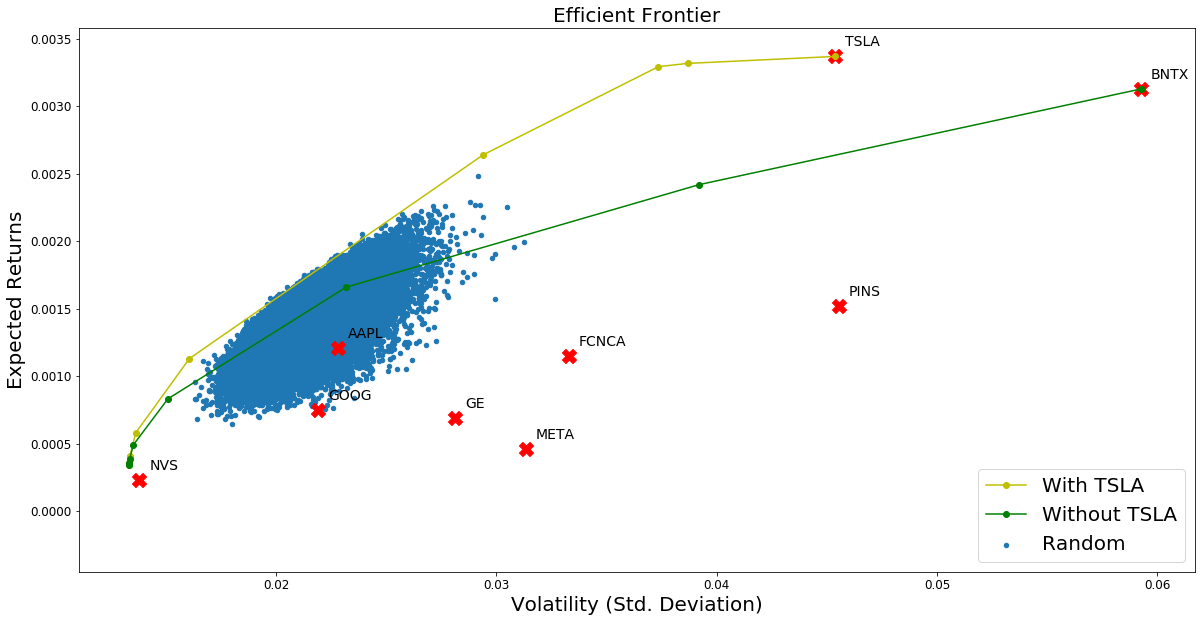

In [17]:
random_portfolios.plot.scatter(x='Volatility', y='Returns', fontsize = 12, figsize=(20,10))
plt.margins(x=0.05, y=-0.3)
plt.xlabel('Volatility (Std. Deviation)', fontsize = 20)
plt.ylabel('Expected Returns', fontsize = 20)
plt.title('Efficient Frontier', fontsize = 20)

#How to put labels right next to the spots?
single_asset_std=np.sqrt(np.diagonal(stock_covariance))
plt.scatter(single_asset_std,daily_mean,marker='X',color='red',s=200)
for i, txt in enumerate(stock_data_daily_returns.keys()):
    plt.annotate(txt, (single_asset_std[i], daily_mean[i]), size=14, xytext=(10,10), ha='left', textcoords='offset points')
# for xc in single_asset_std:
#     plt.axvline(x=xc, color='red')
    
plt.plot(risks, returns, 'y-o')
plt.plot(risks_noT, returns_noT, 'g-o')
plt.legend(['With TSLA', 'Without TSLA', 'Random'], fontsize = 20, loc="lower right")

plt.show()

In [18]:
print(weights.shape)
print(weights, returns, risks)

(9, 1)
[[1.75738215e-07]
 [4.67011195e-07]
 [1.64251929e-07]
 [9.03832896e-08]
 [9.72736118e-08]
 [6.56348788e-08]
 [4.64209720e-08]
 [2.58293200e-07]
 [9.99998635e-01]] [0.0033677814061716226, 0.0033162926260073126, 0.00329219263358804, 0.0026384618992790236, 0.0011294832407236996, 0.0005792547729057431, 0.00040882604514851, 0.0003564927682797105, 0.0003454158188647017, 0.00034242270529514444] [0.04537476514175507, 0.038682551200112957, 0.037361978573282946, 0.029400210018212403, 0.01607204849730741, 0.013634760556829556, 0.013370386946292986, 0.013344567180457961, 0.01334273489456163, 0.01334258444472536]


In [19]:
print(random_portfolios.head())
print(random_portfolios.shape)

    Returns  Volatility  AAPL Weight  BNTX Weight  FCNCA Weight  GE Weight  \
0  0.001924    0.025387     0.159933     0.276254      0.000044   0.115948   
1  0.001414    0.019883     0.122468     0.095279      0.155744   0.046470   
2  0.000960    0.020573     0.028251     0.039865      0.161139   0.194849   
3  0.001131    0.022193     0.009514     0.041372      0.213924   0.023958   
4  0.001282    0.022278     0.132031     0.160519      0.003517   0.144271   

   GOOG Weight  META Weight  NVS Weight  PINS Weight  TSLA Weight  
0     0.056283     0.035413    0.071433     0.132527     0.152165  
1     0.199588     0.006225    0.152391     0.094850     0.126985  
2     0.063072     0.139320    0.176361     0.180027     0.017114  
3     0.102586     0.233351    0.129884     0.168548     0.076863  
4     0.190183     0.143891    0.053936     0.151798     0.019853  
(50000, 11)


In [20]:
random_portfolios.sort_values(["Volatility"], ascending=False)

,Returns,Volatility,AAPL Weight,BNTX Weight,FCNCA Weight,GE Weight,GOOG Weight,META Weight,NVS Weight,PINS Weight,TSLA Weight
40385,0.001992,0.031265,0.173746,0.435689,0.033296,0.014701,0.043611,0.036356,0.072300,0.180968,0.009333
11541,0.001953,0.030819,0.044957,0.441232,0.010556,0.096505,0.146824,0.056528,0.056150,0.109783,0.037466
29732,0.002254,0.030484,0.031359,0.049941,0.044413,0.089707,0.001879,0.068490,0.023039,0.225893,0.465278
23289,0.001906,0.029944,0.089146,0.362850,0.016916,0.030232,0.091953,0.087027,0.032321,0.252146,0.037410
34969,0.001571,0.029934,0.084771,0.108409,0.002027,0.111459,0.001202,0.038830,0.067160,0.516702,0.069439
...,...,...,...,...,...,...,...,...,...,...,...
3445,0.000858,0.016498,0.040103,0.047675,0.095454,0.047326,0.133749,0.131184,0.396666,0.051726,0.056116
44477,0.000683,0.016412,0.045603,0.030520,0.072038,0.259746,0.216048,0.061164,0.311814,0.000105,0.002962
20813,0.000832,0.016389,0.134075,0.036698,0.191887,0.079848,0.140719,0.064728,0.330581,0.001258,0.020205
9715,0.000956,0.016342,0.204236,0.028266,0.159928,0.055122,0.083936,0.013401,0.368124,0.024612,0.062374


In [21]:
# Define function to get risk-based recommendation

def portfolio_recommendation(random_portfolios,maximum_volatility_tolerance):
    eligible_portfolios = random_portfolios[(random_portfolios.Volatility<=maximum_volatility_tolerance)]
    max_return = eligible_portfolios.Returns.max()
    max_return_portfolio = eligible_portfolios[eligible_portfolios.Returns == max_return]
    
    return max_return_portfolio

In [22]:
risk_averse = 0.01
moderate_risk_taker = 0.015
risk_tolerant = 0.02

risk_averse_portfolio = portfolio_recommendation(random_portfolios, risk_averse)
print(risk_averse_portfolio)
moderate_risk_taker_portfolio = portfolio_recommendation(random_portfolios, moderate_risk_taker)
print(moderate_risk_taker_portfolio)
risk_tolerant_portfolio = portfolio_recommendation(random_portfolios, risk_tolerant)
print(risk_tolerant_portfolio)
combined_portfolios = pd.concat([risk_averse_portfolio, moderate_risk_taker_portfolio, risk_tolerant_portfolio], 
                                ignore_index = True, sort = False)
print(combined_portfolios)
rounded_combined_portfolios = round(combined_portfolios, 4)
print(rounded_combined_portfolios)
combined_portfolios.to_csv('rounded_combined_portfolios_1.csv')

Empty DataFrame
Columns: [Returns, Volatility, AAPL Weight, BNTX Weight, FCNCA Weight, GE Weight, GOOG Weight, META Weight, NVS Weight, PINS Weight, TSLA Weight]
Index: []
Empty DataFrame
Columns: [Returns, Volatility, AAPL Weight, BNTX Weight, FCNCA Weight, GE Weight, GOOG Weight, META Weight, NVS Weight, PINS Weight, TSLA Weight]
Index: []
       Returns  Volatility  AAPL Weight  BNTX Weight  FCNCA Weight  GE Weight  \
7348  0.001579    0.019947     0.210196      0.13575      0.092371   0.058105   

      GOOG Weight  META Weight  NVS Weight  PINS Weight  TSLA Weight  
7348     0.020055     0.051909    0.229135      0.00942     0.193059  
    Returns  Volatility  AAPL Weight  BNTX Weight  FCNCA Weight  GE Weight  \
0  0.001579    0.019947     0.210196      0.13575      0.092371   0.058105   

   GOOG Weight  META Weight  NVS Weight  PINS Weight  TSLA Weight  
0     0.020055     0.051909    0.229135      0.00942     0.193059  
   Returns  Volatility  AAPL Weight  BNTX Weight  FCNCA We

In [23]:

risk_averse = 0.02
moderate_risk_taker = 0.03
risk_tolerant = 0.04

risk_averse_portfolio = portfolio_recommendation(random_portfolios, risk_averse)
print(risk_averse_portfolio)
moderate_risk_taker_portfolio = portfolio_recommendation(random_portfolios, moderate_risk_taker)
print(moderate_risk_taker_portfolio)
risk_tolerant_portfolio = portfolio_recommendation(random_portfolios, risk_tolerant)
print(risk_tolerant_portfolio)
combined_portfolios = pd.concat([risk_averse_portfolio, moderate_risk_taker_portfolio, risk_tolerant_portfolio], 
                                ignore_index = True, sort = False)
print(combined_portfolios)
rounded_combined_portfolios = round(combined_portfolios, 4)
print(rounded_combined_portfolios)
rounded_combined_portfolios.to_csv('rounded_combined_portfolios_2.csv')

       Returns  Volatility  AAPL Weight  BNTX Weight  FCNCA Weight  GE Weight  \
7348  0.001579    0.019947     0.210196      0.13575      0.092371   0.058105   

      GOOG Weight  META Weight  NVS Weight  PINS Weight  TSLA Weight  
7348     0.020055     0.051909    0.229135      0.00942     0.193059  
        Returns  Volatility  AAPL Weight  BNTX Weight  FCNCA Weight  \
34477  0.002484    0.029169     0.164491     0.342513       0.05699   

       GE Weight  GOOG Weight  META Weight  NVS Weight  PINS Weight  \
34477   0.059602     0.021975     0.010343    0.011323     0.019396   

       TSLA Weight  
34477     0.313367  
        Returns  Volatility  AAPL Weight  BNTX Weight  FCNCA Weight  \
34477  0.002484    0.029169     0.164491     0.342513       0.05699   

       GE Weight  GOOG Weight  META Weight  NVS Weight  PINS Weight  \
34477   0.059602     0.021975     0.010343    0.011323     0.019396   

       TSLA Weight  
34477     0.313367  
    Returns  Volatility  AAPL Weight  B